In [1]:
#importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import scipy.stats as st

In [3]:
#reading a file and adding column names to it.
names=['target','Alcohol','Malic_acid','Ash','Alcalinity_ash','Magnesium','Total_phenols','Flavanoids','Non-flavanoids_phenols','Proanthocyanins','Color_intensity','Hue','Diluted_wines','Proline']
data = pd.read_csv('wine.csv',header=None,names= names)
data.head()

,target,Alcohol,Malic_acid,Ash,Alcalinity_ash,Magnesium,Total_phenols,Flavanoids,Non-flavanoids_phenols,Proanthocyanins,Color_intensity,Hue,Diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.shape

(178, 14)

In [5]:
data.dtypes

target                      int64
Alcohol                   float64
Malic_acid                float64
Ash                       float64
Alcalinity_ash            float64
Magnesium                   int64
Total_phenols             float64
Flavanoids                float64
Non-flavanoids_phenols    float64
Proanthocyanins           float64
Color_intensity           float64
Hue                       float64
Diluted_wines             float64
Proline                     int64
dtype: object

In [6]:
data.isnull().sum()

target                    0
Alcohol                   0
Malic_acid                0
Ash                       0
Alcalinity_ash            0
Magnesium                 0
Total_phenols             0
Flavanoids                0
Non-flavanoids_phenols    0
Proanthocyanins           0
Color_intensity           0
Hue                       0
Diluted_wines             0
Proline                   0
dtype: int64

## Target variable

```
Basically, dataset is classified across 3 different types of wines. 
Dataset is not biased towards any of three which would be good for classification.
```

In [9]:
data.target.value_counts()

2    71
1    59
3    48
Name: target, dtype: int64

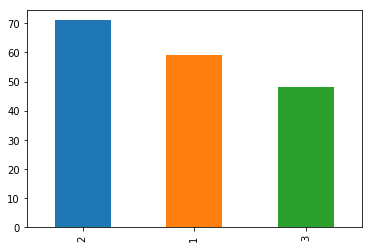

In [13]:
data.target.value_counts().plot(kind = 'bar')

```
Instances of each type of wine:
1 = 71
2 = 59
3 = 48
```

## Alcohol range according to target class


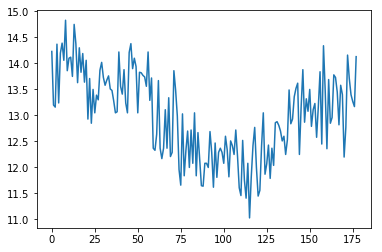

In [14]:
data.Alcohol.plot()

```
In all types of wines, maximum alcohol value is approx 14.8 and min value is approx 11.2
```

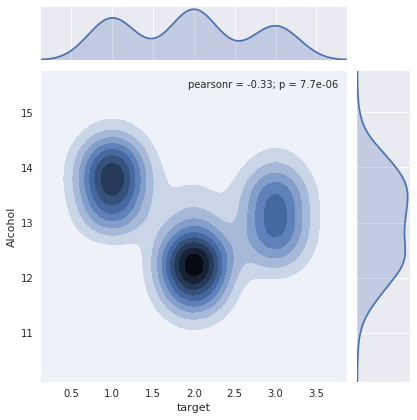

In [78]:
x = sns.jointplot('target','Alcohol', data = data, kind = 'kde')

```
We can see that wine of class 2 has the lowest alcohol range which is 11.0 to 13.8 while class 1 has highest alcohol range between 12.5 to 15. and class 3 has range between 12.0 to 14.5.
```

## Frequency of Malic Acid

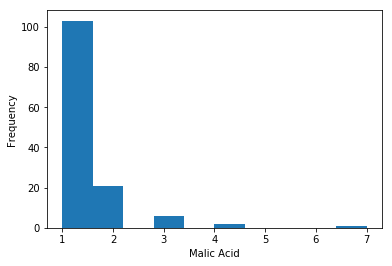

In [25]:
plt.xlabel('Malic Acid')
data.Malic_acid.value_counts().plot(kind = 'hist')

```
Above histogram says that there are more wines having Malic Acid between 1-2.2
```

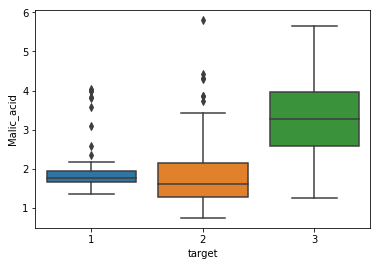

In [38]:
x = sns.boxplot('target','Malic_acid',data = data)

```
From the above box plot, we can see that class 1 wine has very low range for Malic Acid compared to class 3 wine.
class 3 has higher level of Malic Acid while class 2 has lower level.
```

## Relationship between ash and alcalinity of ash

/home/romil/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/romil/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


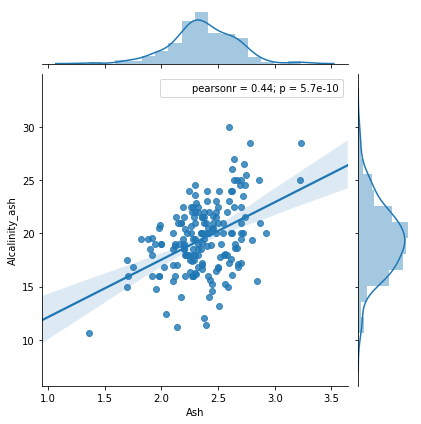

In [30]:
x = sns.jointplot('Ash','Alcalinity_ash',data = data, kind = 'reg')

```
In the avbove graph, we have found linear regression line between these two attribute but points are random rather than following the line. That is why, we can not say much about relationship between Ash and Alcalinity of ash.
```

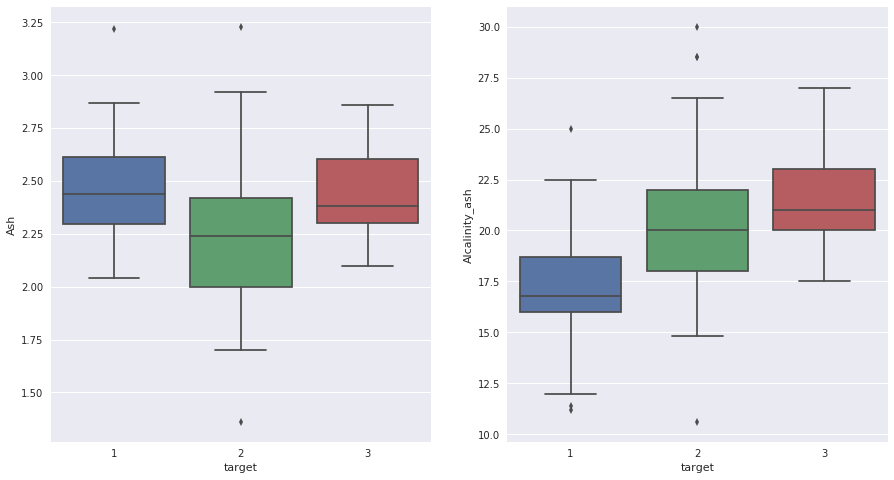

In [58]:
sns.set(rc={'figure.figsize':(15,8)})
plt.subplot(1,2,1)
sns.boxplot('target','Ash',data = data)
plt.subplot(1,2,2)
sns.boxplot('target','Alcalinity_ash', data = data)

## Observation:
```
There is no difference between class 2 and 3 mapping with ash and alcalinity of ash.
But we can differentiate class 1 from class 2 & 3. Class 1 has higher ash value than class 2 while lower alcalinity value than class 2.
```

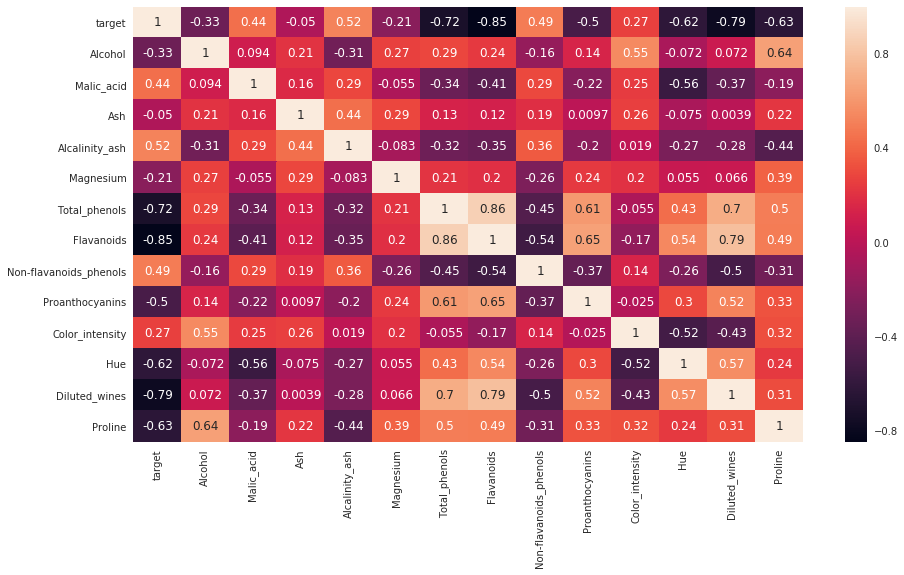

In [63]:
x = sns.heatmap(data.corr(), annot = True)

## Relationship between Flavanoids and other attributes

/home/romil/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/romil/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


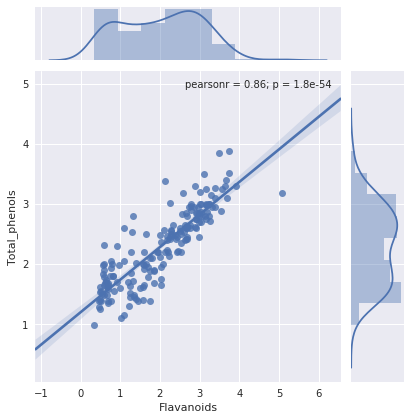

In [66]:
x = sns.jointplot('Flavanoids','Total_phenols', data = data, kind = 'reg')

```
Total number of phenols is directly proportional to Flavanoids.
```

/home/romil/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/romil/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


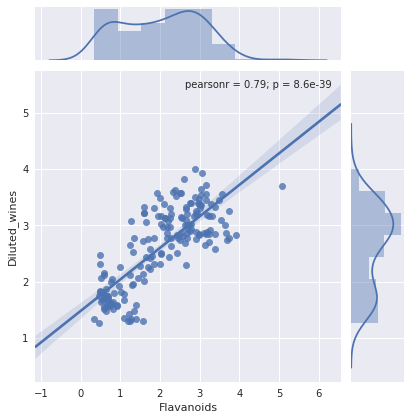

In [72]:
x = sns.jointplot('Flavanoids', 'Diluted_wines', data =data, kind = 'reg')

```
We can see linear relationship between Diluted_wines and Flavanoids.
```

/home/romil/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/romil/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


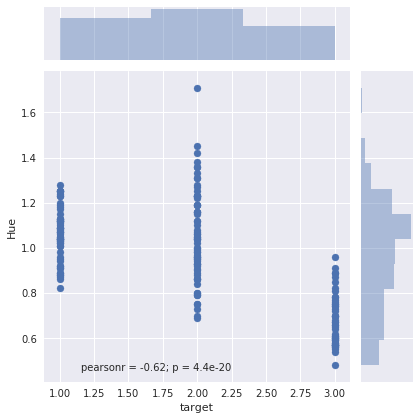

In [74]:
x = sns.jointplot('target','Hue',data = data)

/home/romil/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/romil/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


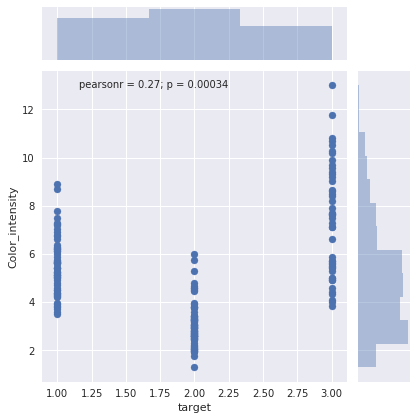

In [75]:
x = sns.jointplot('target','Color_intensity',data = data)

## Observation:
```
From the above two graph, 2nd type of wine has higher hue and 3rd type of wine has lower hue.
And for color intensity, 3rd type of wine has higher color intensity and 2nd type of wine has lower.
```